## Steps 4 and 5 - PCA

In [1]:
%matplotlib inline
import pandas as pd
from plotnine import *

In [2]:
df = pd.read_csv("data/hgu133a_rma_okFiles_080619_MAGETAB-fixed.csv")

In [3]:
df

,Hybridization REF,CompositeElement REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1102960533.CEL,RMA,7.843903,6.655317,6.561170,8.428770,4.331943,9.997028,5.865304,5.157511,...,4.703504,5.688980,12.374575,12.536555,5.403150,4.713231,4.047919,4.012319,4.277983,4.257308
1,1102960569.CEL,RMA,7.607922,6.582941,6.586381,8.679448,4.246734,9.971347,5.988573,5.215961,...,4.882721,5.695677,13.052185,13.082561,5.549325,4.823984,4.118542,3.867210,4.294047,4.130957
2,1102960602.CEL,RMA,7.774873,6.988180,6.712788,8.601999,4.361971,9.590921,6.206851,5.149278,...,5.022235,6.389155,12.908104,13.104754,5.436899,4.666710,3.951301,3.887689,4.335456,4.252916
3,1102960632.CEL,RMA,7.345778,6.695275,6.516051,8.340240,4.375771,9.708060,5.781350,5.041516,...,4.928157,6.226759,12.558607,12.775968,5.445584,4.691382,4.051777,3.905536,4.295104,4.160429
4,1102960664.CEL,RMA,7.676319,6.725969,7.034441,8.704646,4.374744,9.712844,5.984591,5.088845,...,4.896056,5.650863,12.848972,13.062736,5.541452,4.727372,3.908556,3.937984,4.141420,4.125748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5367,GSM9814.CEL,RMA,8.384376,7.020442,6.823220,9.115296,4.873902,8.896327,6.236415,5.209986,...,5.295300,6.300271,13.330022,13.368244,5.681590,4.823509,4.344806,3.918684,4.319664,4.114120
5368,GSM9817.CEL,RMA,8.008073,7.012846,7.756190,8.989796,4.524288,9.075289,6.095048,5.125835,...,5.465700,5.947201,13.381901,13.565438,5.672889,4.688320,4.368711,3.927416,4.246305,4.152228
5369,GSM9835.CEL,RMA,8.058827,6.846252,10.899927,8.918906,4.616359,7.848606,5.798793,5.365443,...,5.059551,5.983592,13.685627,13.582194,5.447459,4.686981,4.332984,3.868145,4.283405,4.356133
5370,GSM9849.CEL,RMA,8.127216,7.217631,7.480647,8.823816,4.420449,8.373651,5.974835,5.157333,...,5.750378,6.587478,13.735901,13.532105,5.778378,4.641064,4.148315,3.930341,4.224848,4.176509


In [4]:
df.dtypes

Hybridization REF        object
CompositeElement REF     object
1007_s_at               float64
1053_at                 float64
117_at                  float64
                         ...   
AFFX-ThrX-5_at          float64
AFFX-ThrX-M_at          float64
AFFX-TrpnX-3_at         float64
AFFX-TrpnX-5_at         float64
AFFX-TrpnX-M_at         float64
Length: 22285, dtype: object

In [6]:
features = df.columns[2:]

In [7]:
# Separating out the features
x = df.loc[:, features].values

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [9]:
finalDf = pd.concat([principalDf, df[['Hybridization REF']]], axis = 1)

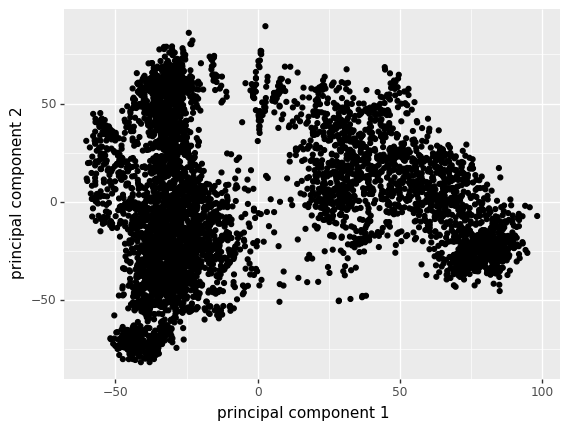

<ggplot: (8785782239001)>

In [10]:
ggplot(finalDf, 
       aes(x = "principal component 1", y="principal component 2")) \
+ geom_point()

In [12]:
pca.components_

array([[-0.01438946, -0.00032199,  0.00494009, ...,  0.00013608,
         0.00027339,  0.0001509 ],
       [-0.0053907 ,  0.01480221, -0.00352546, ..., -0.00045299,
         0.00013247,  0.00016543]])

In [13]:
labels = pd.read_csv("data/E-MTAB-62.sdrf.txt", sep="\t")

In [14]:
labels

,Source Name,Characteristics[OperatorVariation],Characteristics[DataSource],Characteristics[4 meta-groups],Characteristics[15 meta-groups],Characteristics[369 groups],Characteristics[groups with 10 and more replicates],Characteristics[Blood/NonBlood meta-groups],Characteristics[Organism],Characteristics[OrganismPart],...,Protocol REF,Derived Array Data Matrix File,Comment [Derived ArrayExpress FTP file],Factor Value[4 meta-groups],Factor Value[15 meta-groups],Factor Value[369 groups],Factor Value[Blood-NonBlood meta-groups],Factor Value[6 meta-groups],Factor Value[4 groups from blood to incompletely diff],Factor Value[96 groups]
0,GSM23227.CEL,"Richard,Steven,Mitchell",GSE1410,cell line,non neoplastic cell line,293t-tva,,non blood,Homo sapiens,kidney,...,P-MTAB-2072,hgu133a_rma_okFiles_080619_MAGETAB.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,cell line,non neoplastic cell line,293t-tva,non blood,,the rest,
1,1229968152.CEL,"paul,,spellman",E-TABM-157,cell line,solid tissue neoplasm cell line,600MPE breast cancer,,non blood,Homo sapiens,mammary gland,...,P-MTAB-2072,hgu133a_rma_okFiles_080619_MAGETAB.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,cell line,solid tissue neoplasm cell line,600MPE breast cancer,non blood,,the rest,
2,GSM133626.CEL,"Uma,T,Shankavaram",GSE5720,cell line,solid tissue neoplasm cell line,a498 renal cell carcinoma,,non blood,Homo sapiens,kidney,...,P-MTAB-2072,hgu133a_rma_okFiles_080619_MAGETAB.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,cell line,solid tissue neoplasm cell line,a498 renal cell carcinoma,non blood,,the rest,
3,GSM47465.CEL,"Eric,,Hoffman",GSE3183,cell line,solid tissue neoplasm cell line,A549 lung adenocarcinoma,A549 lung adenocarcinoma,non blood,Homo sapiens,lung,...,P-MTAB-2072,hgu133a_rma_okFiles_080619_MAGETAB.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,cell line,solid tissue neoplasm cell line,A549 lung adenocarcinoma,non blood,cell line,the rest,A549 lung adenocarcinoma
4,GSM124909.CEL,"Andrea,Patricelli,Malizia",GSE5457,cell line,solid tissue neoplasm cell line,A549 lung adenocarcinoma,A549 lung adenocarcinoma,non blood,Homo sapiens,lung,...,P-MTAB-2072,hgu133a_rma_okFiles_080619_MAGETAB.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,cell line,solid tissue neoplasm cell line,A549 lung adenocarcinoma,non blood,cell line,the rest,A549 lung adenocarcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5367,GSM38674.CEL,"Sakari,,Vanharanta",GSE2152,neoplasm,other neoplasm,uterine tumor,uterine tumor,non blood,Homo sapiens,uterus,...,P-MTAB-2072,hgu133a_rma_okFiles_080619_MAGETAB.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,neoplasm,other neoplasm,uterine tumor,non blood,solid tissue,the rest,uterine tumor
5368,GSM38677.CEL,"Sakari,,Vanharanta",GSE2152,neoplasm,other neoplasm,uterine tumor,uterine tumor,non blood,Homo sapiens,uterus,...,P-MTAB-2072,hgu133a_rma_okFiles_080619_MAGETAB.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,neoplasm,other neoplasm,uterine tumor,non blood,solid tissue,the rest,uterine tumor
5369,GSM52673.CEL,"Sakari,,Vanharanta",GSE2725,neoplasm,other neoplasm,uterine tumor,uterine tumor,non blood,Homo sapiens,uterus,...,P-MTAB-2072,hgu133a_rma_okFiles_080619_MAGETAB.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,neoplasm,other neoplasm,uterine tumor,non blood,solid tissue,the rest,uterine tumor
5370,GSM38681.CEL,"Sakari,,Vanharanta",GSE2152,neoplasm,other neoplasm,uterine tumor,uterine tumor,non blood,Homo sapiens,uterus,...,P-MTAB-2072,hgu133a_rma_okFiles_080619_MAGETAB.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,neoplasm,other neoplasm,uterine tumor,non blood,solid tissue,the rest,uterine tumor


In [15]:
finalDf = finalDf.merge(labels, left_on="Hybridization REF", right_on="Source Name")

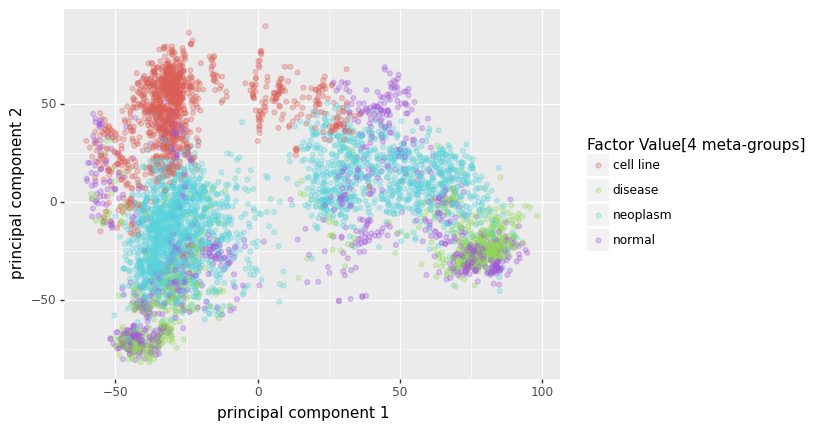

<ggplot: (8785701039761)>

In [16]:
ggplot(finalDf, 
       aes(x = "principal component 1", y="principal component 2", color="Factor Value[4 meta-groups]")) \
+ geom_point(alpha=0.3)

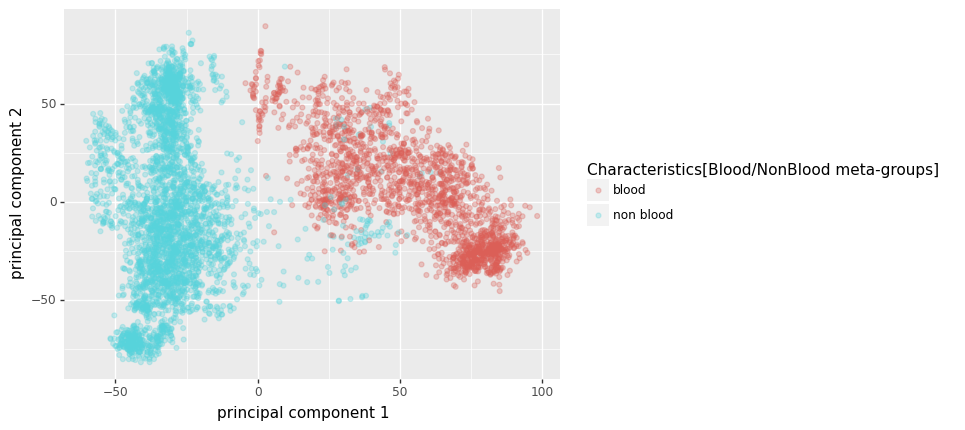

<ggplot: (8785685484897)>

In [17]:
ggplot(finalDf, 
       aes(x = "principal component 1", y="principal component 2", color="Characteristics[Blood/NonBlood meta-groups]")) \
+ geom_point(alpha=0.3)

In [15]:
pca.explained_variance_ratio_

array([0.16791272, 0.11565574])

## Clustering just for fun

In [16]:
# https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(x)

In [17]:
finalDf["clusters"] =  pd.Series(y_km).astype("str")

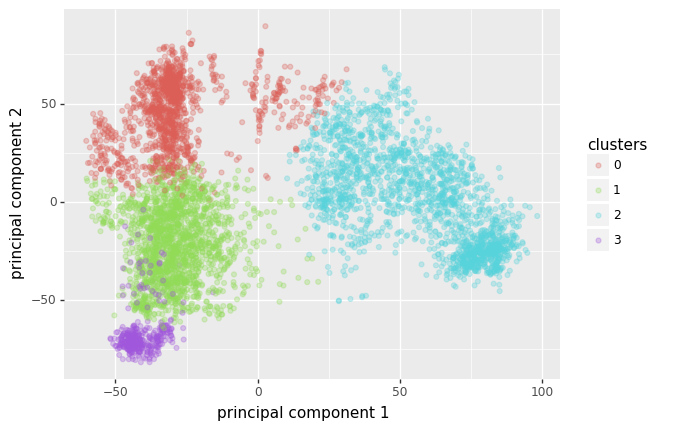

<ggplot: (8761683461361)>

In [19]:
ggplot(finalDf, 
       aes(x = "principal component 1", y="principal component 2", color="clusters")) \
+ geom_point(alpha=0.3)

In [21]:
dist = []
for i in range(1, 10):
    print(i)
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
    )
    result = km.fit(x)
    dist.append(result.inertia_)

1
2
3
4
5
6
7
8


KeyboardInterrupt: 

In [23]:
idf = pd.DataFrame({"Number of Clusters":range(1, 8), "Distortion":dist})

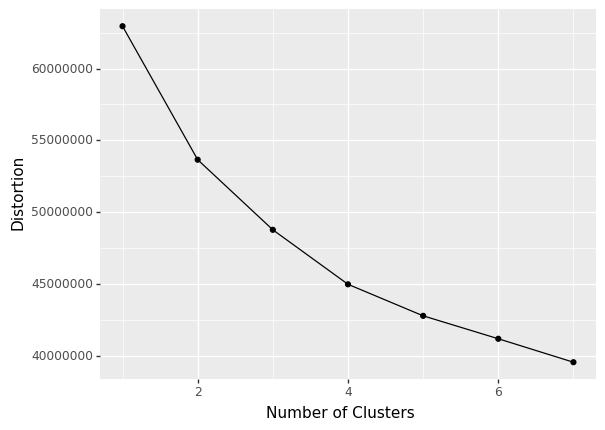

<ggplot: (8761688678684)>

In [24]:
ggplot(idf, aes(x="Number of Clusters", y="Distortion")) + geom_line() + geom_point()

## How I converted the data

In [ ]:
df = pd.read_csv("data/hgu133a_rma_okFiles_080619_MAGETAB.csv", sep='\t', header=None).T

In [ ]:
df.columns = df.iloc[0]                                 # Set new column names
df.drop(0,inplace=True)                                 # Drop duplicated row

In [ ]:
df.to_csv("data/out.csv", index=False)

In [ ]:
df = pd.read_csv("data/hgu133a_rma_okFiles_080619_MAGETAB.csv", sep='\t', header=None).T
df.columns = df.iloc[0]
df.drop(0,inplace=True)
df.to_csv("data/hgu133a_rma_okFiles_080619_MAGETAB_fixed.csv", index=False)